<a href="https://colab.research.google.com/github/AndreRab/Book-Clustering-and-Recommendation-System/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book Clustering and Recommendation System

Welcome to this Jupyter Notebook where we explore [dataset goodbooks-10k](https://github.com/zygmuntz/goodbooks-10k) to clustering books using Natural Language Processing (NLP) techniques. The goal of this project is to develop a system that not only clusters books effectively based on their metadata but also recommends books to users based on their reading preferences.

## Objective

The primary objective of this notebook is to implement and evaluate different clustering techniques to group books. By transforming book tags, titles, and author names into numerical vectors, we aim to uncover underlying patterns and similarities among books. Additionally, we will use the Term Frequency-Inverse Document Frequency (TF-IDF) metric to name these clusters, enhancing the distinction between them based on the most significant tags.

## Methodology



*   **Data Preprocessing:** Convert book tags, titles, and author names into numerical vectors using NLP techniques.
*  **Clustering:** Experiment with various machine learning algorithms to cluster books. Analyze and compare the effectiveness of each method.
*   **Cluster Naming:** Utilize the TF-IDF metric to assign descriptive names to each cluster based on the prevalence of tags, which helps in better understanding and segregation of the clusters.
*   **Recommendation Algorithm:** Develop a suggestion algorithm that leverages users' to-read lists and ratings from other books. This algorithm aims to recommend the best 'n' books for users to read next, personalized to their tastes and previous interactions.




## Data Preprocessing
In this section, I will preprocess the data, checking what we have and how I can optimize them for future use.

In [1]:
import pandas as pd

In [2]:
books = pd.read_csv("books.csv")
books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [3]:
book_tags = pd.read_csv("book_tags.csv")
book_tags

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


In [4]:
tags = pd.read_csv('tags.csv')
tags

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
...,...,...
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ


In [5]:
ratings = pd.read_csv('ratings.csv')
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [6]:
to_read = pd.read_csv('to_read.csv')
to_read

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380
...,...,...
912700,39374,1049
912701,10492,5180
912702,21879,4827
912703,21879,6642


After examining the DataFrames with 'to_read' and 'rating', which I will use for the recommendation system, I will utilize 'books', 'book_tags', and 'tags' for clustering.

### Tags data preporation
In this section, I will review the tags to clean the data and identify the most useful ones.

Firstly, let's check, that all tags have positive count number

In [7]:
book_tags[book_tags['count'] < 1]

,goodreads_book_id,tag_id,count
922051,18607805,10197,-1
922052,18607805,21619,-1
922053,18607805,17246,-1
922054,18607805,6552,-1
922055,18607805,2272,-1
959611,22931009,9221,-1


In [8]:
book_tags.loc[book_tags['count'] < 1, 'count'] = 1
book_tags[book_tags['count'] < 1]

,goodreads_book_id,tag_id,count


Are all tags usefull?

In [9]:
len(tags) == len(book_tags.groupby('tag_id').count())

True

The most usefull tags:

In [10]:
tag_id_count = book_tags.groupby('tag_id')['count'].sum().sort_values(ascending = False)
tag_id_count

,count
tag_id,
30574,140718761
8717,7507958
11557,4503173
11743,3688819
11305,3548157
...,...
7826,1
2272,1
2278,1


In [11]:
tag_id_count.describe()

,count
count,3.425200e+04
mean,6.097491e+03
std,7.627092e+05
min,1.000000e+00
25%,3.000000e+00
50%,1.000000e+01
75%,5.200000e+01
max,1.407188e+08


As we can see, more than half of the tags are used only 10 times, indicating that not all tags are truly useful. Let's examine some random tags to determine whether it's necessary to clean them or if all of them are essential.

In [12]:
len(tag_id_count)

34252

In [13]:
for name in tags.sample(50).tag_name:
    print(name)

dog-tales
fic000000
human-animal-interactions
snowflakes
الكتب-المفضلة
sherri-s
luxe-series
j-r-r-tolkien
mysteries-global
stephanie-plum-novels
diverse-characters
bigbook2017
elderly
alcohol
13th-century
cookboks
omnibus-3
dccomics
james-pd
bipolar
karen-slaughter
in-the-library
purchased-but-unread
historical-thriller
siena
pol
lost
other-sci-fi
pandemic
wives
religion
4-enough
soviet-literature
مكتبتي
self-aware-humor
favourite-childhood-books
daisy-goodwin
coho
lds-religious
stored
ray-
next-up
series-first
bush-administration
children-bedtime
lj-smith
the-one-and-only-ivan
books-i-didn-t-finish
tarih
missions


In [14]:
book_tags.groupby('goodreads_book_id').tag_id.nunique().describe()

,tag_id
count,10000.000000
mean,99.990400
std,0.586295
min,56.000000
25%,100.000000
50%,100.000000
75%,100.000000
max,100.000000


As we observe, the tags are in different languages, and some are rare, with each book averaging about 100 tags. Let's try removing a few tags to see what impact this has.

In [15]:
treshold = 1000
most_popular_tag_id_counts = tag_id_count[tag_id_count > treshold]

print(f'{len(tag_id_count)} old size of tags')
print(f'{len(most_popular_tag_id_counts)} new size of tags')
print(f'{len(tag_id_count) - len(most_popular_tag_id_counts) } tags were deleted')

34252 old size of tags
1934 new size of tags
32318 tags were deleted


In [16]:
popular_book_tags = book_tags[book_tags['tag_id'].isin(most_popular_tag_id_counts.index)]

popular_tags_count_per_book = popular_book_tags.groupby('goodreads_book_id').tag_id.nunique()
popular_tags_count_per_book.describe()

,tag_id
count,10000.000000
mean,84.525800
std,11.551843
min,20.000000
25%,79.000000
50%,87.000000
75%,93.000000
max,100.000000


As seen in the results, we deleted 95% of the tags, yet each book still averages 84 tags. This indicates that although we removed a significant portion of the tags, we still retain substantial information about each book.

In [17]:
popular_book_tags

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999901,33288638,5207,7
999902,33288638,28528,7
999903,33288638,2132,7
999904,33288638,17080,7


In [18]:
tags_by_count = pd.DataFrame(data = tag_id_count).reset_index().sort_values('count', ascending = False)
tags_by_count

,tag_id,count
0,30574,140718761
1,8717,7507958
2,11557,4503173
3,11743,3688819
4,11305,3548157
...,...,...
31200,15127,1
31201,10204,1
31202,912,1
31203,10205,1


In [19]:
books_prepared = books.loc[books.goodreads_book_id.isin(popular_tags_count_per_book.index)]

In [20]:
popular_tags = tags[tags.tag_id.isin(most_popular_tag_id_counts)]
popular_tags

,tag_id,tag_name
1004,1004,3-sigma-force-series
1005,1005,3-sisters-ranch-barrel-racing
1007,1007,3-star
1008,1008,3-star-books
1009,1009,3-star-shelf
...,...,...
33327,33327,Η-Βιβλιοθήκη-μου
33854,33854,سيرة-نبوية
33925,33925,علاء-الأسوانى
33973,33973,فوضي-الحواس


Let's examine a sample of the tags that we have left.

In [21]:
for name in popular_tags.sample(50).tag_name:
    print(name)

amazon100
alexandra-ripley
attorneys
badass-ladies
josephine-angelini
insomnia
puerto
in-the-garden
3-sisters-ranch-barrel-racing
own-keep-for-life
big-stone-gap-series
antropologia
aging-rockstar
alzheimer-disease
biographies
813-5
325
to-read-technical
adyra
a-book-read-05-to-09
alex-cooper-series
cover_red
absolutely-loved
appeal-adrenaline
before-1990
already-read
amish-tripathi
anne-rice
berserk
newberry-award-winners
paper-book
4-star
adelle-waldman
computing-tech
fifty-shades-of-grey
art-and-craft-including-instruction
aimee-bender
buy
asoiaf
allende
author-kelley-armstrong
alaa-alaswani
4-to-5-rating
a-have
bleach-manga
5b
author-foot-in-mouth-disease
antarctica
before-2008
ana-and-budda-s-books


As we see, the majority of the tags are in English and they appear quite understandable.

### Books data preporation
In this section, I will review each column of the books DataFrame to determine which information we can use for our clustering task.

In [22]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [23]:
features_cat_bert = ['original_title', 'title', 'authors', 'language_code']

features_num = ['books_count', 'original_publication_year', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']

ids = ['book_id', 'goodreads_book_id', 'best_book_id', 'work_id']

Let's identify which columns have missing values that we need to fill.

In [24]:
books.isna().any()

,0
book_id,False
goodreads_book_id,False
best_book_id,False
work_id,False
books_count,False
isbn,True
isbn13,True
authors,False
original_publication_year,True
original_title,True


#### language code

In [25]:
books_prepared.language_code.describe()

,language_code
count,8916
unique,25
top,eng
freq,6341


In [26]:
books_prepared.language_code.unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [27]:
books_prepared.language_code.fillna('eng', inplace = True)
books_prepared.language_code.replace({'en-US': 'eng','en-CA': 'eng', 'en-GB': 'eng', 'en': 'eng'}, inplace=True)
books_prepared.language_code.unique()

<ipython-input-27-10402484509a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_prepared.language_code.fillna('eng', inplace = True)


array(['eng', 'spa', 'fre', 'nl', 'ara', 'por', 'ger', 'nor', 'jpn',
       'vie', 'ind', 'pol', 'tur', 'dan', 'fil', 'ita', 'per', 'swe',
       'rum', 'mul', 'rus'], dtype=object)

#### original_title

In [28]:
books_prepared.loc[books_prepared['original_title'].isna(), 'original_title'] = books_prepared.loc[books_prepared['original_title'].isna(), 'title']
books_prepared.isna().any()

,0
book_id,False
goodreads_book_id,False
best_book_id,False
work_id,False
books_count,False
isbn,True
isbn13,True
authors,False
original_publication_year,True
original_title,False


#### original_publication_year

In [29]:
books_prepared.original_publication_year.describe()

,original_publication_year
count,9979.000000
mean,1981.987674
std,152.576665
min,-1750.000000
25%,1990.000000
50%,2004.000000
75%,2011.000000
max,2017.000000


In [30]:
books_prepared.loc[books_prepared['original_publication_year'] < 0, 'original_publication_year'] = (
    -1 * books_prepared.loc[books_prepared['original_publication_year'] < 0, 'original_publication_year']
)

In [31]:
books_prepared.original_publication_year.describe()

,original_publication_year
count,9979.000000
mean,1985.028259
std,105.907412
min,8.000000
25%,1990.000000
50%,2004.000000
75%,2011.000000
max,2017.000000


In [32]:
books_prepared[books_prepared.original_publication_year < 1000]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
78,79,1381,1381,3356006,1703,143039954,9.780143e+12,"Homer, Robert Fagles, E.V. Rieu, Frédéric Mugl...",720.0,Ὀδύσσεια,...,670326,710757,8101,29703,65629,183082,224120,208223,https://images.gr-assets.com/books/1390173285m...,https://images.gr-assets.com/books/1390173285s...
340,341,1371,1371,3293141,1726,140275363,9.780140e+12,"Homer, Robert Fagles, Frédéric Mugler, Bernard...",750.0,Ἰλιάς,...,241088,273565,4763,7701,20845,68844,89384,86791,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
402,403,10534,10534,3200649,1865,1590302257,9.781590e+12,"Sun Tzu, Thomas Cleary",500.0,孫子兵法 [Sūnzi bīngfǎ],...,167332,203948,6335,2930,11589,48265,70644,70520,https://images.gr-assets.com/books/1453417993m...,https://images.gr-assets.com/books/1453417993s...
530,531,52357,52357,189503,601,393320979,9.780393e+12,"Unknown, Seamus Heaney",975.0,Beowulf,...,155903,184187,5098,12256,25619,56758,51660,37894,https://images.gr-assets.com/books/1327878125m...,https://images.gr-assets.com/books/1327878125s...
771,772,30289,30289,1625515,842,140449140,9.780140e+12,"Plato, Desmond Lee",380.0,Πολιτεία,...,110274,122747,2261,2772,7531,29394,42284,40766,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
823,824,1554,1554,3098166,498,1580495931,9.781580e+12,"Sophocles, J.E. Thomas",430.0,Οἰδίπους Τύραννος,...,119496,134384,2129,3032,12324,42020,45436,31572,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
1098,1099,57854,67896,100074,1265,679776192,9.780680e+12,"Lao Tzu, Gia-Fu Feng, Jane English, Chungliang...",300.0,道德經 [dào dé jīng],...,39863,80961,3165,903,2332,10967,22924,43835,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
1119,1120,21348,21348,868263,942,192840509,9.780193e+12,"Aesop, Laura Harris, Laura Gibbs",560.0,Aesopica,...,88508,98962,1441,773,3717,22587,34885,37000,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
1279,1280,12914,12914,288738,830,679729526,9.780680e+12,"Virgil, Robert Fitzgerald",17.0,Æneis,...,75051,85351,1804,1531,6436,23683,28909,24792,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
1520,1521,7728,7728,1052210,423,1580493882,9.781580e+12,"Sophocles, J.E. Thomas",441.0,Ἀντιγόνη,...,67608,78535,1893,1881,8279,25895,25697,16783,https://images.gr-assets.com/books/1486701308m...,https://images.gr-assets.com/books/1486701308s...


In [33]:
len(books_prepared[books_prepared.original_publication_year.isna()].original_publication_year)

21

In [34]:
books_prepared.original_publication_year.fillna(int(books_prepared.original_publication_year.mean()), inplace = True)

<ipython-input-34-c15606c97dc7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_prepared.original_publication_year.fillna(int(books_prepared.original_publication_year.mean()), inplace = True)


In [35]:
books_prepared.original_publication_year.isna().any()

False

#### Numerical features check
Finally, let's examine our numerical features for any anomalies that could cause issues during our clustering process.

In [36]:
books_prepared.loc[:, features_num].describe()

,books_count,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,75.712700,1985.028200,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,170.470728,105.796139,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.000000,8.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,23.000000,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,40.000000,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,67.000000,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,3455.000000,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


### Transformer embedding
In this section, I will enhance the description of each book by vectorizing categorical features using language models. This approach is optimal if we aim to create a robust semantic representation of our features.

In [36]:
!pip install -U sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 41.9 MB/s eta 0:00:00
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_

In [57]:
import torch.nn.functional as F

from torch import Tensor
from transformers import AutoTokenizer, AutoModel

model_name = 'intfloat/multilingual-e5-small'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

ValueError: module functions cannot set METH_CLASS or METH_STATIC

In [ ]:
def average_pool(last_hidden_states: Tensor,
                 attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

def tensor_to_numpy(model_output: Tensor):
    return model_output.squeeze().detach().cpu().numpy()

In [ ]:
most_popular_tags = tags.merge(most_popular_tag_id_counts, on='tag_id').iloc[:, :-1]

def get_tags_by_book_id(id):
  tag_ids = book_tags[book_tags.goodreads_book_id == id].tag_id
  return most_popular_tags[most_popular_tags.tag_id.isin(tag_ids)].tag_name.values

In [ ]:
def text_as_embeding(text):
  query = "query: " + text
  batch_dict = tokenizer(query, max_length=popular_tags_count_per_book.max() + 10, padding=True, truncation=True, return_tensors='pt')
  outputs = model(**batch_dict)
  embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])

  embeddings = F.normalize(embeddings, p=2, dim=1)
  return tensor_to_numpy(embeddings)

In [ ]:
def book_description_as_embedding(book_id, author, original_title, title, language_code):
  model_input = f'Book Details: Original Title: {original_title}, Edition Title: {title}, Author: {author}, Language: {language_code}, Tags: {", ".join(get_tags_by_book_id(book_id))}'
  return text_as_embeding(model_input)

In [ ]:
books_prepared.loc[:, 'description'] = books.apply(lambda x: book_description_as_embedding(x.goodreads_book_id, x.authors, x.original_title, x.title, x.language_code), axis=1)

In [ ]:
books_prepared.head()

Let's save our updated books DataFrame where we can find descriptions for each book.

In [ ]:
books_prepared.to_csv("books_prepared.csv", index=False)

## Clustering
In this section, I will perform essential data preprocessing for the clustering task, try different algorithms, and create the final clusters.

### Read books_prepared.csv and convert description to numpy

In [37]:
import pandas as pd
import numpy as np
books_prepared = pd.read_csv("books_prepared.csv")
books_prepared

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,description
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,[-0.00089513 -0.02843395 -0.08094645 -0.052248...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,[ 4.94049191e-02 5.24108950e-03 -4.29621302e-...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,[ 0.04930791 -0.03800914 -0.06640217 -0.064811...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,[ 0.06204414 -0.02081617 -0.08483319 -0.047680...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,[ 3.84813100e-02 -5.71437879e-03 -7.46475011e-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,[ 1.95540693e-02 -3.74376252e-02 -8.25379491e-...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,[ 2.38765441e-02 -3.90033983e-02 -9.34520140e-...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...,[ 0.06781536 -0.0615317 -0.07186092 -0.050840...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,[ 0.04784352 -0.02535581 -0.09050535 -0.055426...


In [38]:
import ast
import re

def string_to_numpy(string):
    if string[1] == ' ':
        string = string[:1] + string[2:]
    return np.array(ast.literal_eval(re.sub(r"\s+", ",", string)))

books_prepared.description = books_prepared.description.map(lambda x: string_to_numpy(x))

In [39]:
type(books_prepared.description[0])

numpy.ndarray

### Creation of Input Matrix for Clustering

In [40]:
for index, column in enumerate(books_prepared.columns):
    print(index, ":", column)

0 : book_id
1 : goodreads_book_id
2 : best_book_id
3 : work_id
4 : books_count
5 : isbn
6 : isbn13
7 : authors
8 : original_publication_year
9 : original_title
10 : title
11 : language_code
12 : average_rating
13 : ratings_count
14 : work_ratings_count
15 : work_text_reviews_count
16 : ratings_1
17 : ratings_2
18 : ratings_3
19 : ratings_4
20 : ratings_5
21 : image_url
22 : small_image_url
23 : description


In [41]:
books_features = books_prepared.columns[12:21]
books_features

Index(['average_rating', 'ratings_count', 'work_ratings_count',
       'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3',
       'ratings_4', 'ratings_5'],
      dtype='object')

In [42]:
numerical_cols = books_features
array_cols = ['description']

Let's combine our description vectors with the numerical data to create a comprehensive dataset for clustering.

In [43]:
array_data = [np.vstack(books_prepared[col]) for col in array_cols]

numerical_data = books_prepared[numerical_cols].values
combined_data = np.hstack([numerical_data] + array_data)

combined_data.shape

(10000, 393)

As we see, each book is represented by a vector with a dimension of 393, which could pose issues for some clustering algorithms due to the high dimensionality. Unfortunately, each algorithm I tried for dimensionality reduction did not yield satisfactory results. That's why the last processing transformation I will make is standardizing the data. This will help normalize the features and potentially improve the performance of the clustering algorith

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(combined_data)

### Useful functions
In this section, I will describe useful functions that I will use for each algorithm to assess how well it performs. These functions will help evaluate the effectiveness of the clustering algorithms and guide our choice of the best approach.

The first useful function is called visualization. This function displays how our clusters appear by using the PCA algorithm to reduce dimensions. Of course, we can't infer too much about the quality of the clustering just by looking at our reduced space, but it's still a valuable tool to get a preliminary sense of how distinct our clusters are.

In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualisation(data, labels):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=30)
    plt.title("K-means Clustering with PCA")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

For the next function, I will need to assign each book to a cluster. This will involve updating our dataset to include cluster assignments and possibly calculating additional metrics that can help further analyze the clustering effectiveness.

In [46]:
books_prepared['cluster'] = 1

The main function for cluster naming is show_n_most_popular_tags_by_cluster. This function utilizes the TF-IDF metric to identify the most significant tags for each cluster, helping to describe the thematic or content-based focus of each group effectively.

In [47]:
import numpy as np
from collections import Counter

def show_n_most_popular_tags_by_cluster(n, n_clusters):
    books_with_tag = books_prepared.merge(book_tags, on='goodreads_book_id')
    tag_counts = books_with_tag.groupby('tag_id').cluster.nunique()
    #create dataframe with IDF metric for each tag
    tag_IDF = pd.DataFrame(data = {'tag_id': most_popular_tag_id_counts.index, 'count_by_all_books': most_popular_tag_id_counts.values})
    tag_IDF['count_by_clusters'] = tag_IDF.apply(lambda x: tag_counts[x.tag_id], axis = 1)
    tag_IDF['IDF'] = tag_IDF.apply(lambda x: -np.log(x.count_by_clusters/n_clusters), axis = 1)
    result = {}

    # find the most popular tag for each tags
    for ids in books_prepared.groupby('cluster').goodreads_book_id:
        cluster_number = ids[0]
        cluster_popular_tags_id  = Counter()

        # check each book tags
        tags_for_book = popular_book_tags.groupby('goodreads_book_id')
        for goodreads_book_id in tqdm(ids[1]):
            tags_id_for_book = tags_for_book.get_group(goodreads_book_id).tag_id.values
            cluster_popular_tags_id.update(tags_id_for_book)

        # create dataframe with each tag in cluster and it's count to calculate TF metric
        df = pd.DataFrame(data={'tag_id': cluster_popular_tags_id.keys(), 'count_in_cluster': cluster_popular_tags_id.values()},
                          index=range(0, len(cluster_popular_tags_id)))

        # calculate TF-IDF metric
        all_tags_in_cluster_count = df.count_in_cluster.sum()
        df['TF'] = df.apply(lambda x: x.count_in_cluster / all_tags_in_cluster_count, axis=1)
        df['IDF'] = df.apply(lambda x: tag_IDF[tag_IDF.tag_id == x.tag_id].IDF.values[0], axis=1)
        df['TF-IDF'] = df.apply(lambda x: x.TF * x.IDF, axis=1)
        df.sort_values('TF-IDF', ascending=False, inplace=True)

        # find names of top n tags
        topn_tags = df.head(n).tag_id
        cluster_popular_tags_name = [tags[tags.tag_id == tag_id].tag_name.values[0] for tag_id in topn_tags]
        print(f"Cluster number {cluster_number} has tags: {cluster_popular_tags_name}")
        result[cluster_number] = cluster_popular_tags_name
    return result

After identifying the most relevant tags, we would like to name each cluster. To achieve this goal, we can use another language model that will generate names for our clusters based on the tags identified.

In [48]:
from transformers import pipeline

def name_the_cluster_by_tags(tags):
  prompt = f"Based on the tags {tags} what would be a good name for this book cluster?"
  checkpoint = 'google/flan-t5-large'
  pipe = pipeline("text2text-generation", model=checkpoint)

  return pipe(prompt)[0]['generated_text']
name_the_cluster_by_tags(['work', 'business-books', 'management', 'career', 'learning', 'leadership', 'to-read-business', 'productivity', 'professional-development', 'success'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'career development'

In [49]:
def create_cluster_data_frame(popular_tags_per_cluster):
  data = [{'cluster_id': cluster_id,
            'cluster_tags': tags,
            'cluster_name': 'unk'}
        for cluster_id, tags in popular_tags_per_cluster.items()
    ]
  df = pd.DataFrame(data)
  df.cluster_name = df.apply(lambda x: name_the_cluster_by_tags(x.cluster_tags), axis=1)
  return df

### Clusterization models
In this section, I will attempt to find the best model for our clustering problem.

#### K-means clustering algorithm
Let's try to find optimal clusters number using Elbow Method and Silhouette Score

In [50]:
from tqdm import tqdm
from sklearn.cluster import KMeans

100%|██████████| 29/29 [00:35<00:00,  1.22s/it]


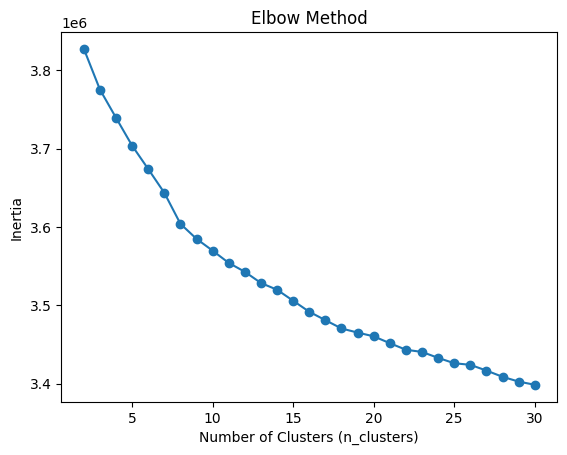

In [50]:
range_n_clusters = range(2, 31)
inertia = []

for n in tqdm(range_n_clusters):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


100%|██████████| 29/29 [02:06<00:00,  4.37s/it]


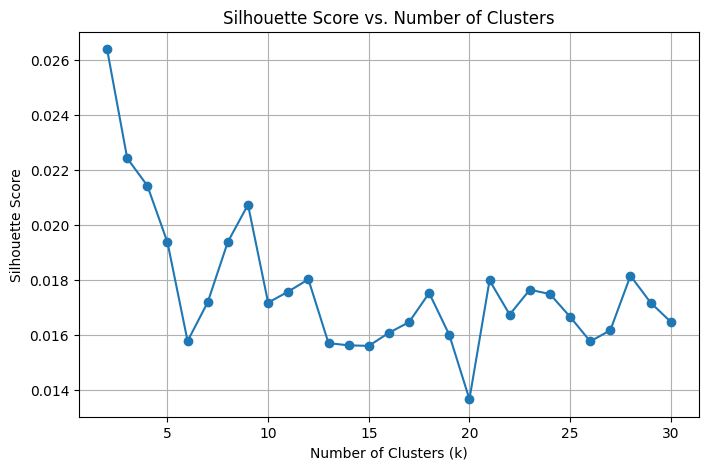

In [51]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for n in tqdm(range_n_clusters):
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()
plt.show()

As we see the optimal clusters number is 9

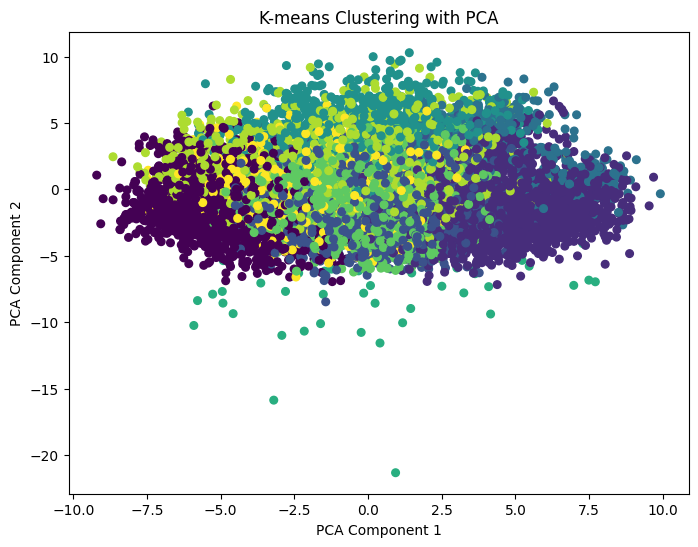

In [51]:
n_clusters = 9

kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_result = kmeans_model.fit_predict(data_scaled)

visualisation(data_scaled, kmeans_result)

In [52]:
pd.Series(kmeans_result).value_counts().describe()

,count
count,9.000000
mean,1111.111111
std,617.946083
min,74.000000
25%,757.000000
50%,960.000000
75%,1680.000000
max,1949.000000


In [53]:
pd.Series(kmeans_result).value_counts()

,count
1,1949
0,1703
6,1680
2,1403
4,960
7,949
8,757
3,525
5,74


In [54]:
books_prepared['cluster'] = kmeans_result

In [55]:
create_cluster_data_frame(show_n_most_popular_tags_by_cluster(10, n_clusters))

100%|██████████| 1703/1703 [00:00<00:00, 2167.50it/s]


Cluster number 0 has tags: ['book-boyfriend', 'book-boyfriends', 'bad-boys', 'bad-boy', 'hot', 'alpha-males', 'romance-contemporary', 'angst', 'na', 'alpha-male']


100%|██████████| 1949/1949 [00:00<00:00, 2447.59it/s]


Cluster number 1 has tags: ['to-read-non-fiction', 'popular-science', 'unread', 'to-read-history', 'sociology', 'social-science', 'general-non-fiction', 'calibre', 'to-read-nonfiction', 'nonfiction-to-read']


100%|██████████| 1403/1403 [00:00<00:00, 2187.97it/s]


Cluster number 2 has tags: ['2016-releases', 'first-reads', '2015-releases', 'arc', '2016-challenge', '2016-books-read', '2016-release', 'best-of-2016', 'netgalley', 'listened']


100%|██████████| 525/525 [00:00<00:00, 1454.89it/s]


Cluster number 3 has tags: ['1001-books-to-read', '1001-books-to-read-before-you-die', '1001-to-read', '1001-import', '1001-books-you-must-read-before-you', '1001', '1001-books', 'modern-library-100', 'time-100', 'modern-library-top-100']


100%|██████████| 960/960 [00:00<00:00, 2838.93it/s]


Cluster number 4 has tags: ['children-s-picture-books', 'childrens-picture-books', 'preschool', 'kindergarten', 'favorite-children-s-books', 'storytime', 'kid-s-books', 'picturebooks', 'favorite-picture-books', 'story-time']


100%|██████████| 74/74 [00:00<00:00, 850.03it/s]


Cluster number 5 has tags: ['1001-books-to-read-before-you-die', '1001', 'harry-potter-series', 'divergent', 'veronica-roth', 'stephanie-meyer', 'jk-rowling', 'ya-fantasy', '1001-books', 'the-hunger-games']


100%|██████████| 1680/1680 [00:00<00:00, 2389.29it/s]


Cluster number 6 has tags: ['calibre', 'unread', 'fantasy-read', 'read-fantasy', 'sf-f', 'fantasy-epic', 'crime-thrillers', 'political-thriller', 'favorite-authors', 'military-fiction']


100%|██████████| 949/949 [00:00<00:00, 1634.25it/s]


Cluster number 7 has tags: ['bad-boys', 'book-boyfriend', 'bad-boy', 'alpha-males', 'book-boyfriends', 'alpha', 'work', 'hot', 'angst', 'na']


100%|██████████| 757/757 [00:00<00:00, 3618.75it/s]


Cluster number 8 has tags: ['teen-romance', 'meg-cabot', 'romance-contemporary', 'beach-reads', 'young-adult-romance', 'contemporary-romance', 'nora-roberts-jd-robb', 'chicklit', 'romantic-comedy', 'womens-fiction']


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


,cluster_id,cluster_tags,cluster_name
0,0,"[book-boyfriend, book-boyfriends, bad-boys, ba...",hot alpha males
1,1,"[to-read-non-fiction, popular-science, unread,...",to-read-nonfiction
2,2,"[2016-releases, first-reads, 2015-releases, ar...",arc
3,3,"[1001-books-to-read, 1001-books-to-read-before...",1001 books to read before you die
4,4,"[children-s-picture-books, childrens-picture-b...",favorite children's books
5,5,"[1001-books-to-read-before-you-die, 1001, harr...",1001 books
6,6,"[calibre, unread, fantasy-read, read-fantasy, ...",sf-f
7,7,"[bad-boys, book-boyfriend, bad-boy, alpha-male...",hot
8,8,"[teen-romance, meg-cabot, romance-contemporary...",beach reads


The result of the K-means algorithm is promising, but to ensure we select the best possible method, let's try other algorithms as well.

#### DBSCAN

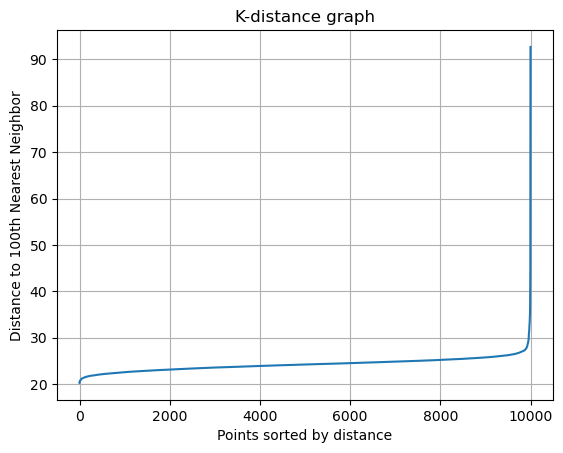

In [ ]:
from sklearn.neighbors import NearestNeighbors

k = 100
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

distances = np.sort(distances[:, -1], axis=0)
plt.plot(distances)
plt.ylabel('Distance to {}th Nearest Neighbor'.format(k))
plt.xlabel('Points sorted by distance')
plt.title('K-distance graph')
plt.grid()
plt.show()


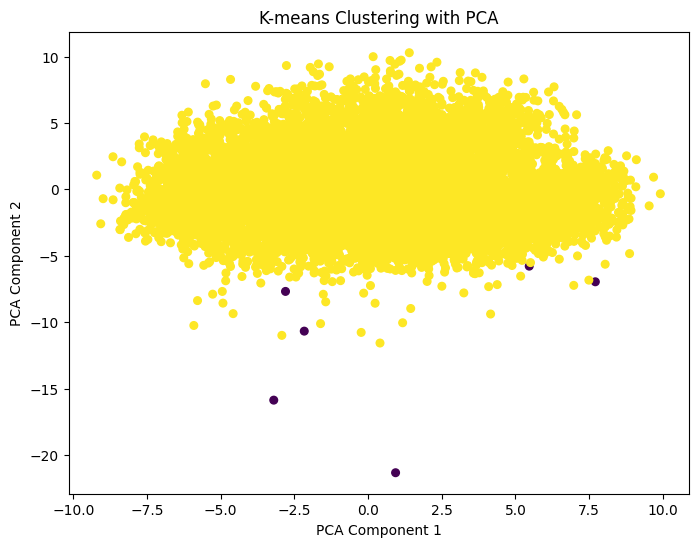

In [67]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=30, min_samples=100)
dbscan_result = dbscan_model.fit_predict(data_scaled)

visualisation(data_scaled, dbscan_result)

In [68]:
np.unique(dbscan_result)

array([-1,  0])

We observed poor clustering results using the optimal k-distance graph. This outcome suggests that the chosen value of k might not effectively capture the natural groupings within our data, or that the data itself poses challenges for this clustering method, such as high dimensionality or insufficient separation between clusters. We might need to explore alternative methods or adjust our approach to improve the clustering quality.

#### HDBSCAN

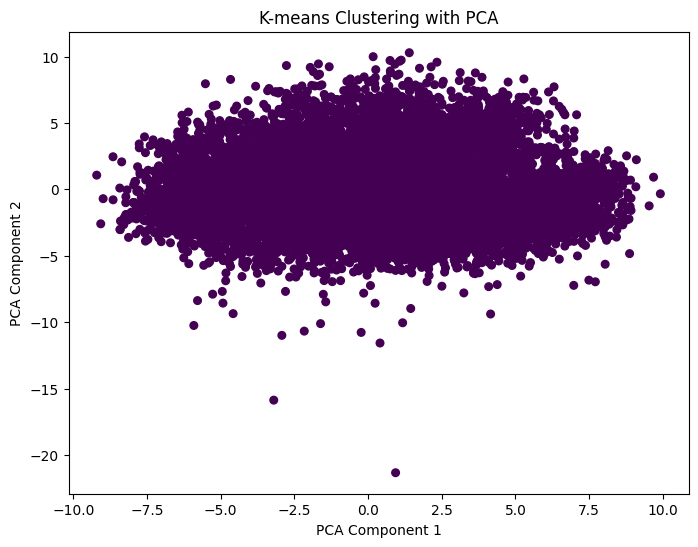

In [69]:
from sklearn.cluster import HDBSCAN

hdbscan = HDBSCAN(min_cluster_size=100)
hdbscan_result = hdbscan.fit_predict(data_scaled)

visualisation(data_scaled, hdbscan_result)

In [70]:
pd.Series(hdbscan_result).value_counts()

,count
-1,10000


In [71]:
pd.Series(hdbscan_result).value_counts().describe()

,count
count,1.0
mean,10000.0
std,NaN
min,10000.0
25%,10000.0
50%,10000.0
75%,10000.0
max,10000.0


HDBSCAN also doesn't perform well when we aim to have more than 100 books in one cluster. This could indicate that HDBSCAN's density-based clustering mechanism struggles with larger cluster sizes in our dataset, possibly due to the distribution of data points or noise. Adjusting the parameters of HDBSCAN or considering a different clustering technique might be necessary to achieve better results with larger clusters

#### BIRCH

In [56]:
from sklearn.cluster import Birch

100%|██████████| 29/29 [16:43<00:00, 34.60s/it]


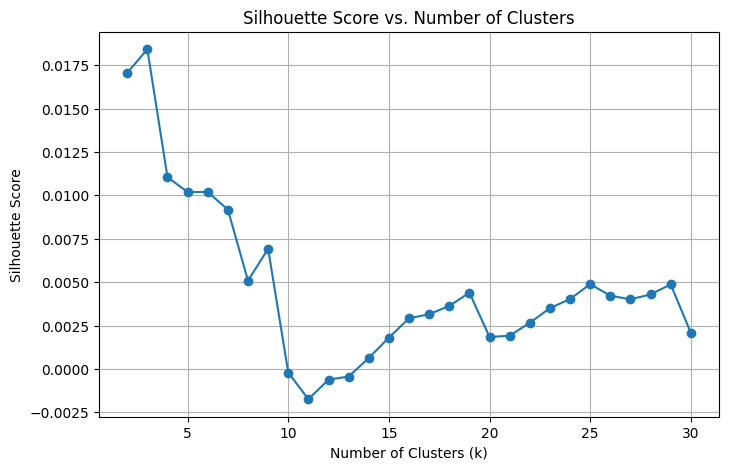

In [76]:
silhouette_scores = []

for n in tqdm(range_n_clusters):
    birch = Birch(n_clusters=n)
    cluster_labels = birch.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()

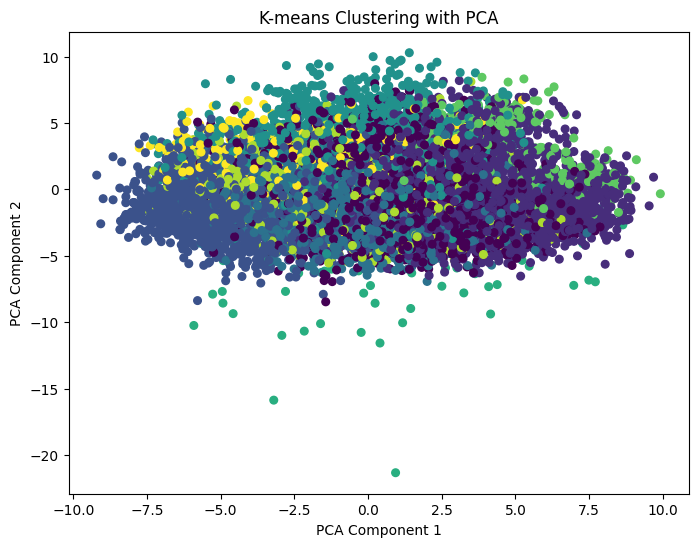

In [57]:
n_clusters = 9

birch = Birch(n_clusters=n_clusters)
birch_result = birch.fit_predict(data_scaled)

visualisation(data_scaled, birch_result)

In [58]:
pd.Series(birch_result).value_counts()

,count
1,2291
2,1792
0,1730
3,1645
4,1022
7,741
6,362
8,303
5,114


In [69]:
books_prepared['cluster'] = birch_result
create_cluster_data_frame(show_n_most_popular_tags_by_cluster(10, n_clusters))

100%|██████████| 1730/1730 [00:00<00:00, 2309.22it/s]


Cluster number 0 has tags: ['business-books', 'to-read-business', 'learning', 'productivity', 'entrepreneurship', 'success', 'leadership', 'management', 'professional', 'work']


100%|██████████| 2291/2291 [00:00<00:00, 2375.41it/s]


Cluster number 1 has tags: ['essay', 'academic', 'non-fiction-history', 'pop-science', 'the-king', 'to-read-history', 'history-biography', 'king-stephen', 'theory', 'historical-non-fiction']


100%|██████████| 1792/1792 [00:00<00:00, 2582.49it/s]


Cluster number 2 has tags: ['book-boyfriend', 'alpha-male', 'bad-boys', 'steamy', 'adult-romance', 'new-adult-romance', 'pnr-uf', 'angst', 'bad-boy', 'erotic-romance']


100%|██████████| 1645/1645 [00:00<00:00, 2374.79it/s]


Cluster number 3 has tags: ['dean-koontz', 'koontz', 'koontz-dean', 'mystery-series', 'action-thriller', 'calibre', 'thriller-suspense', 'mysteries-thrillers', 'crime-thrillers', 'fantasy-read']


100%|██████████| 1022/1022 [00:00<00:00, 2280.76it/s]


Cluster number 4 has tags: ['childrens-picture-books', 'preschool', 'children-s-picture-books', 'kindergarten', 'picturebooks', 'kid-stuff', 'kiddos', 'storytime', 'edrd-314', 'from-my-childhood']


100%|██████████| 114/114 [00:00<00:00, 1155.42it/s]


Cluster number 5 has tags: ['clàssics', 'rory-gilmore-reading-challenge', 'harry-potter-series', 'classic-lit', 'rory-gilmore-challenge', 'to-read-classics', 'harry-potter', 'american-classics', 'classici', 'required-reading']


100%|██████████| 362/362 [00:00<00:00, 1019.29it/s]


Cluster number 6 has tags: ['1001-to-read', '1001-books-you-must-read-before-you', '1001-import', '1900s', 'guardian-1000', 'modern-library-top-100', 'modern-library-100-best-novels', 'time-top-100', '1001-books-to-read-before-you-die', '1001']


100%|██████████| 741/741 [00:00<00:00, 1143.36it/s]


Cluster number 7 has tags: ['roberts', 'roberts-nora', 'nora-roberts', 'nora', 'nora-roberts-jd-robb', 'contemp-romance', 'romance-contemporary', 'girly', 'plum', 'stephanie-plum-series']


100%|██████████| 303/303 [00:00<00:00, 897.65it/s] 


Cluster number 8 has tags: ['read-manga', 'shojo', 'shoujo', 'manga-and-comics', 'anime', 'manga-manhwa', 'manga-to-read', 'shounen', 'comics-manga', 'manga-read']


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


,cluster_id,cluster_tags,cluster_name
0,0,"[business-books, to-read-business, learning, p...",to read business books
1,1,"[essay, academic, non-fiction-history, pop-sci...",king-stephen
2,2,"[book-boyfriend, alpha-male, bad-boys, steamy,...",steamy
3,3,"[dean-koontz, koontz, koontz-dean, mystery-ser...",crime-thrillers
4,4,"[childrens-picture-books, preschool, children-...",from my childhood
5,5,"[clàssics, rory-gilmore-reading-challenge, har...",harry potter series
6,6,"[1001-to-read, 1001-books-you-must-read-before...",1001-to-read
7,7,"[roberts, roberts-nora, nora-roberts, nora, no...",Stephanie Plum
8,8,"[read-manga, shojo, shoujo, manga-and-comics, ...",manga-to-read


The result of the BIRCH algorithm is promising, but to ensure we select the best possible method, let's try other algorithms as well.

#### AffinityPropagation

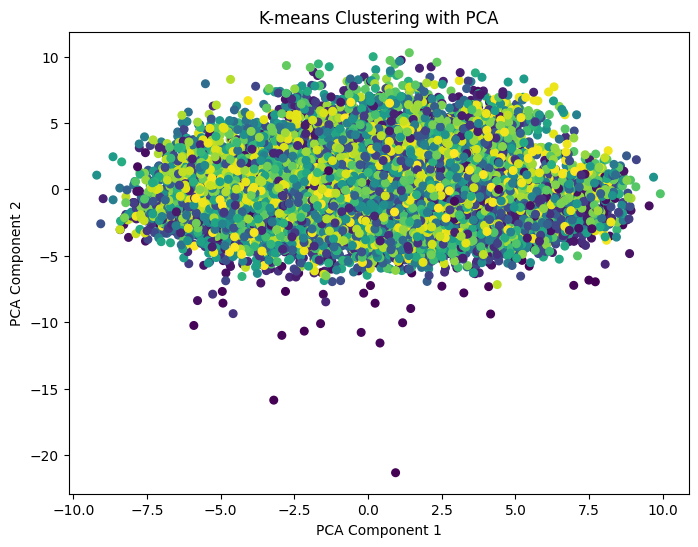

In [77]:
from sklearn.cluster import AffinityPropagation

affinity = AffinityPropagation(random_state=42)
affinity_result = affinity.fit_predict(data_scaled)

visualisation(data_scaled, affinity_result)

In [78]:
pd.Series(affinity_result).value_counts()

,count
928,92
605,78
978,76
416,60
503,59
...,...
1,1
7,1
12,1
14,1


The main issue with this algorithm is that it resulted in 1000 clusters, some of which have only one member. This outcome indicates that the splitting isn't optimal, as it produces too many small, potentially overfitted clusters that may not effectively represent meaningful groupings within the data.

#### Gaussian Mixture Model

In [60]:
from sklearn.mixture import GaussianMixture

100%|██████████| 29/29 [31:03<00:00, 64.26s/it]


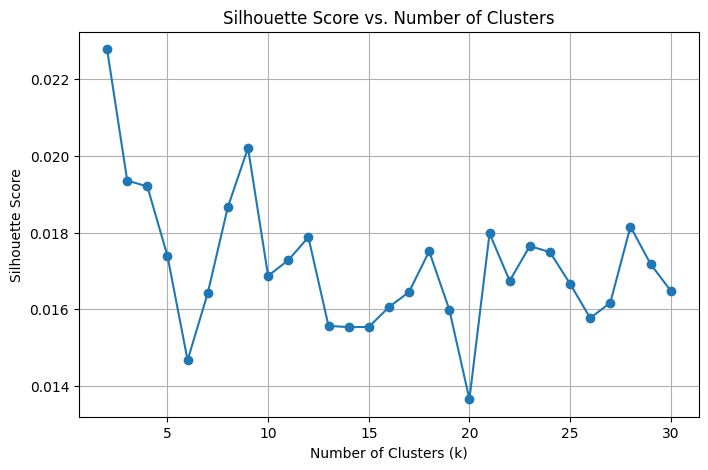

In [81]:
silhouette_scores = []

for n in tqdm(range_n_clusters):
    gmm = GaussianMixture(n_components=n, random_state=42)
    cluster_labels = gmm.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()

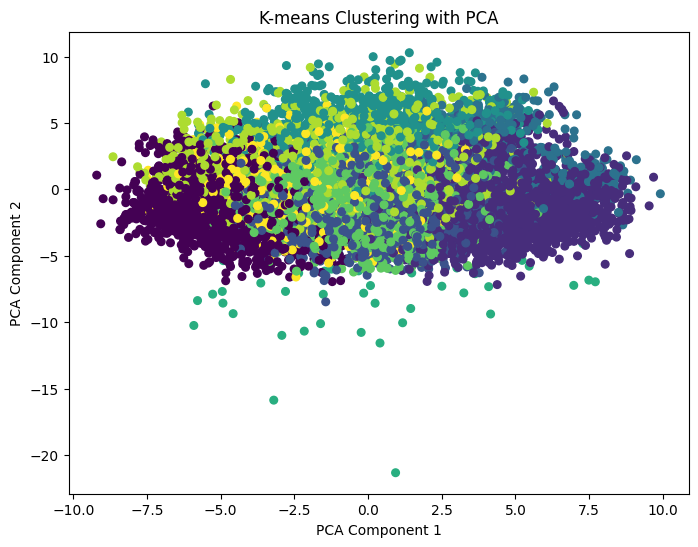

In [61]:
n_components = 9
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm_result = gmm.fit_predict(data_scaled)

visualisation(data_scaled, gmm_result)

In [62]:
pd.Series(gmm_result).value_counts()

,count
1,1945
6,1727
0,1671
2,1400
4,965
7,930
8,763
3,525
5,74


In [64]:
books_prepared['cluster'] = gmm_result
create_cluster_data_frame(show_n_most_popular_tags_by_cluster(10, n_components))

100%|██████████| 1671/1671 [00:00<00:00, 4062.25it/s]


Cluster number 0 has tags: ['book-boyfriend', 'book-boyfriends', 'bad-boys', 'bad-boy', 'pnr', 'hot', 'romance-paranormal', 'alpha-males', 'romance-contemporary', 'angst']


100%|██████████| 1945/1945 [00:00<00:00, 4212.58it/s]


Cluster number 1 has tags: ['to-read-non-fiction', 'to-read-nonfiction', 'non-fiction-to-read', 'partially-read', 'popular-science', 'leadership', 'to-read-history', 'unread', 'sociology', 'social-science']


100%|██████████| 1400/1400 [00:00<00:00, 3913.38it/s]


Cluster number 2 has tags: ['2016-releases', 'first-reads', '2015-releases', 'to-read-non-fiction', 'arc', '2016-books-read', 'to-read-nonfiction', 'leadership', 'botm', 'best-of-2016']


100%|██████████| 525/525 [00:00<00:00, 3547.44it/s]


Cluster number 3 has tags: ['1001-books-to-read', '1001-books-to-read-before-you-die', '1001-to-read', '1001-import', '1001-books-you-must-read-before-you', '1001', '1001-books', 'time-100', 'modern-library-100', 'modern-library-top-100']


100%|██████████| 965/965 [00:00<00:00, 3981.17it/s]


Cluster number 4 has tags: ['children-s-picture-books', 'childrens-picture-books', 'preschool', 'kindergarten', 'favorite-children-s-books', 'storytime', 'kid-s-books', 'picturebooks', 'favorite-picture-books', 'story-time']


100%|██████████| 74/74 [00:00<00:00, 1110.76it/s]


Cluster number 5 has tags: ['1001-books-to-read-before-you-die', '1001', 'harry-potter-series', 'veronica-roth', 'divergent', 'stephanie-meyer', 'jk-rowling', 'ya-fantasy', '1001-books', 'hunger-games']


100%|██████████| 1727/1727 [00:00<00:00, 3308.49it/s]


Cluster number 6 has tags: ['calibre', 'unread', 'political-thriller', 'fantasy-read', 'laurell-k-hamilton', 'read-fantasy', 'sf-f', 'fantasy-epic', 'crime-thrillers', 'favorite-authors']


100%|██████████| 930/930 [00:00<00:00, 2727.41it/s]


Cluster number 7 has tags: ['bad-boys', 'book-boyfriend', 'bad-boy', 'alpha-males', 'to-read-non-fiction', 'alpha', 'book-boyfriends', 'leadership', 'work', 'angst']


100%|██████████| 763/763 [00:00<00:00, 2062.59it/s]


Cluster number 8 has tags: ['meg-cabot', 'teen-romance', 'romance-contemporary', 'beach-reads', 'nora-roberts-jd-robb', 'contemporary-romance', 'young-adult-romance', 'chicklit', 'romantic-comedy', 'womens-fiction']


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


,cluster_id,cluster_tags,cluster_name
0,0,"[book-boyfriend, book-boyfriends, bad-boys, ba...",hot
1,1,"[to-read-non-fiction, to-read-nonfiction, non-...",to-read-history
2,2,"[2016-releases, first-reads, 2015-releases, to...",best-of-2016
3,3,"[1001-books-to-read, 1001-books-to-read-before...",1001-books-to-read-before-you-die
4,4,"[children-s-picture-books, childrens-picture-b...",favorite children's books
5,5,"[1001-books-to-read-before-you-die, 1001, harr...",1001 books to read before you die
6,6,"[calibre, unread, political-thriller, fantasy-...",political-thrillers
7,7,"[bad-boys, book-boyfriend, bad-boy, alpha-male...",book-boyfriends
8,8,"[meg-cabot, teen-romance, romance-contemporary...",beach reads


#### The best model
From all the models, the best are K-means, BIRCH, and Gaussian Mixture Model. However, all clusters in the BIRCH model have unique names, which is why I think the BIRCH model is the best one. In the end, let's try to predict cluster names using less than 10 tags.

In [72]:
n_clusters = 9

books_prepared['cluster'] = birch_result
clusters = create_cluster_data_frame(show_n_most_popular_tags_by_cluster(15, n_clusters))
clusters

100%|██████████| 1730/1730 [00:00<00:00, 2544.94it/s]


Cluster number 0 has tags: ['business-books', 'to-read-business', 'learning', 'productivity', 'entrepreneurship', 'success', 'leadership', 'management', 'professional', 'work', 'biz', 'business', 'professional-development', 'cookbook', 'personal-growth']


100%|██████████| 2291/2291 [00:00<00:00, 2424.17it/s]


Cluster number 1 has tags: ['essay', 'academic', 'non-fiction-history', 'pop-science', 'the-king', 'to-read-history', 'history-biography', 'king-stephen', 'theory', 'historical-non-fiction', 'world-history', 'hist', 'european-literature', 'philosophy-religion', 'political-science']


100%|██████████| 1792/1792 [00:00<00:00, 2213.36it/s]


Cluster number 2 has tags: ['book-boyfriend', 'alpha-male', 'bad-boys', 'steamy', 'adult-romance', 'new-adult-romance', 'pnr-uf', 'angst', 'bad-boy', 'erotic-romance', 'romance-paranormal', 'hot-hot-hot', 'angsty', 'hot', 'dual-pov']


100%|██████████| 1645/1645 [00:01<00:00, 1040.10it/s]


Cluster number 3 has tags: ['dean-koontz', 'koontz', 'koontz-dean', 'mystery-series', 'action-thriller', 'calibre', 'thriller-suspense', 'mysteries-thrillers', 'crime-thrillers', 'fantasy-read', 'forensic', 'read-fantasy', 'robb-jd', 'in-death-series', 'robb-j-d']


100%|██████████| 1022/1022 [00:00<00:00, 2162.92it/s]


Cluster number 4 has tags: ['childrens-picture-books', 'preschool', 'children-s-picture-books', 'kindergarten', 'picturebooks', 'kid-stuff', 'kiddos', 'storytime', 'edrd-314', 'from-my-childhood', 'childrensbooks', 'board-books', 'classroom', 'favorite-picture-books', 'favorite-children-s-books']


100%|██████████| 114/114 [00:00<00:00, 1206.17it/s]


Cluster number 5 has tags: ['clàssics', 'rory-gilmore-reading-challenge', 'harry-potter-series', 'classic-lit', 'rory-gilmore-challenge', 'to-read-classics', 'harry-potter', 'american-classics', 'classici', 'required-reading', 'rory-gilmore', 'stephanie-meyer', 'jk-rowling', 'classic-literature', '1001']


100%|██████████| 362/362 [00:00<00:00, 1732.73it/s]


Cluster number 6 has tags: ['1001-to-read', '1001-books-you-must-read-before-you', '1001-import', '1900s', 'guardian-1000', 'modern-library-top-100', 'modern-library-100-best-novels', 'time-top-100', '1001-books-to-read-before-you-die', '1001', 'to-read-classics', '1001-books-to-read', 'modern-library-100', 'modernism', 'english-lit']


100%|██████████| 741/741 [00:00<00:00, 3207.49it/s]


Cluster number 7 has tags: ['roberts', 'roberts-nora', 'nora-roberts', 'nora', 'nora-roberts-jd-robb', 'contemp-romance', 'romance-contemporary', 'girly', 'plum', 'stephanie-plum-series', 'meg-cabot', 'womens-fiction', 'adult-romance', 'romance-novels', 'romantic-suspense']


100%|██████████| 303/303 [00:00<00:00, 1341.59it/s]


Cluster number 8 has tags: ['read-manga', 'shojo', 'shoujo', 'manga-and-comics', 'anime', 'manga-manhwa', 'manga-to-read', 'shounen', 'comics-manga', 'manga-read', 'mangas', 'manga-and-graphic-novels', 'graphic-novels-manga', 'sequential-art', 'read-comics']


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


,cluster_id,cluster_tags,cluster_name
0,0,"[business-books, to-read-business, learning, p...",to-read-business
1,1,"[essay, academic, non-fiction-history, pop-sci...",king-stephen
2,2,"[book-boyfriend, alpha-male, bad-boys, steamy,...",erotic-romance
3,3,"[dean-koontz, koontz, koontz-dean, mystery-ser...",forensic
4,4,"[childrens-picture-books, preschool, children-...",from-my-childhood
5,5,"[clàssics, rory-gilmore-reading-challenge, har...",harry potter series
6,6,"[1001-to-read, 1001-books-you-must-read-before...",1001-to-read
7,7,"[roberts, roberts-nora, nora-roberts, nora, no...",jd robb
8,8,"[read-manga, shojo, shoujo, manga-and-comics, ...",read-manga


Let's save our results

In [73]:
clusters.to_csv("clusters.csv", index = False)
books_prepared.to_csv("books_with_clusters.csv", index = False)

## User recomendation algorythm
In this section, I will present and describe my user recommendation algorithm. This algorithm is designed to suggest books to users based on their reading preferences and historical data. It will incorporate insights derived from the clustering process to match users with books that fall into their preferred clusters, thereby enhancing personalization and the overall reading experience. The algorithm will use user ratings, to-read lists, and possibly other factors to recommend the most suitable books for each user.

In [74]:
ratings.user_id.nunique()

53424

In [75]:
to_read

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380
...,...,...
912700,39374,1049
912701,10492,5180
912702,21879,4827
912703,21879,6642


In [76]:
to_read.user_id.nunique()

48871

Let's define functions to identify the best books that a user has already read and the books that a user wants to read

In [77]:
def find_best_user_books(user_id, top_n = None):
    user_ratings = ratings[ratings['user_id'] == user_id]
    return user_ratings if top_n is None else user_ratings.nlargest(top_n, 'rating')

def find_user_to_read_books(user_id, top_n = None):
    user_to_read = to_read[to_read.user_id == user_id]
    return user_to_read if top_n is None else user_to_read.head(top_n)

In [78]:
find_best_user_books(1, 10)

,user_id,book_id,rating
0,1,258,5
78,1,1796,5
230489,1,11,5
230490,1,1644,5
230492,1,136,5
230495,1,35,5
230502,1,4,5
230505,1,1521,5
230506,1,70,5
230516,1,2002,5


In [79]:
find_user_to_read_books(1, 1)

,user_id,book_id
581413,1,1874


Let's define a function that will return the best books in a cluster for a user, utilizing their to-read list and previous ratings.

In [80]:
from sklearn.metrics.pairwise import cosine_similarity

def find_new_book_from_cluster(cluster, user_id, top_n):
    # Dataframe with all books from cluster
    books_in_cluster = books_prepared[books_prepared.cluster == cluster]

    # Books with which we would compaire
    best_user_books = books_in_cluster[books_in_cluster.book_id.isin(find_best_user_books(user_id, 10).book_id.values)]
    to_read_user_books = books_in_cluster[books_in_cluster.book_id.isin(find_user_to_read_books(user_id, 10).book_id.values)]
    book_ids = pd.concat([to_read_user_books, best_user_books], axis = 0).index.values
    target_vectors = data_scaled[book_ids]

    # Books without user books
    books_in_cluster_without_target = books_in_cluster[
        (~books_in_cluster.book_id.isin(best_user_books.book_id)) &
        (~books_in_cluster.book_id.isin(to_read_user_books.book_id))
    ]
    books_in_cluster_vector = data_scaled[books_in_cluster_without_target.index.values]

    # The best books for user
    similarities = cosine_similarity(target_vectors, books_in_cluster_vector).sum(axis = 0)
    similar_books_ind = similarities.argsort()[-top_n:][::-1]

    similar_books = books_in_cluster_without_target.reset_index().iloc[similar_books_ind, :]
    return similar_books.set_index('index')


In [84]:
find_new_book_from_cluster(cluster = 1, user_id = 1, top_n = 10)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,description,cluster
index,,,,,,,,,,,,,,,,,,,,,
823,824,1554,1554,3098166,498,1580495931,9.781580e+12,"Sophocles, J.E. Thomas",430.0,Οἰδίπους Τύραννος,...,2129,3032,12324,42020,45436,31572,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,"[0.0260306, -0.03855003, -0.06188248, -0.03771...",1
171,172,15823480,15823480,2507928,1492,345803922,9.780346e+12,"Leo Tolstoy, Louise Maude, Leo Tolstoj, Aylmer...",1877.0,Анна Каренина,...,18064,11738,26945,88365,158179,187569,https://images.gr-assets.com/books/1352422904m...,https://images.gr-assets.com/books/1352422904s...,"[0.0403686203, -0.0442726091, -0.0846021846, -...",1
1466,1467,4912857,5196764,3252824,178,385528701,9.780386e+12,"Carlos Ruiz Zafón, Lucia Graves",2008.0,El juego del ángel,...,7130,1125,5123,18613,28668,21405,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,"[0.02416259, -0.00802074, -0.06763246, -0.0609...",1
497,498,656,656,4912783,1017,192833987,9.780193e+12,"Leo Tolstoy, Henry Gifford, Aylmer Maude, Loui...",1869.0,Война и миръ,...,8062,4952,9691,31876,60043,86430,https://images.gr-assets.com/books/1413215930m...,https://images.gr-assets.com/books/1413215930s...,"[0.04625107, -0.01966603, -0.07442541, -0.0457...",1
5811,5812,587666,587666,2117724,75,7235801,9.780007e+12,Paulo Coelho,2000.0,Ser Como o Rio que Flui,...,821,303,882,3391,4983,5064,https://images.gr-assets.com/books/1399717203m...,https://images.gr-assets.com/books/1399717203s...,"[0.0359414369, -0.0173893459, -0.0551257282, -...",1
771,772,30289,30289,1625515,842,140449140,9.780140e+12,"Plato, Desmond Lee",380.0,Πολιτεία,...,2261,2772,7531,29394,42284,40766,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,"[0.04612478, -0.01126707, -0.04460179, -0.0643...",1
4331,4332,261243,261243,804111,336,140440399,9.780140e+12,"Thucydides, Rex Warner, Moses I. Finley",411.0,Ἱστορίαι,...,584,672,1745,5860,8019,8157,https://images.gr-assets.com/books/1422072332m...,https://images.gr-assets.com/books/1422072332s...,"[0.0294359792, -0.0337675847, -0.0512513258, -...",1
340,341,1371,1371,3293141,1726,140275363,9.780140e+12,"Homer, Robert Fagles, Frédéric Mugler, Bernard...",750.0,Ἰλιάς,...,4763,7701,20845,68844,89384,86791,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,"[0.03592777, -0.01303651, -0.05995404, -0.0460...",1
7660,7661,82888,82888,1889484,207,850515033,9.780851e+12,Machado de Assis,1899.0,Dom Casmurro,...,363,127,410,1823,3921,5915,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,"[0.03309869, -0.04131802, -0.0820429, -0.04032...",1


Let's define a function that calculates a score for each cluster based on user interaction. This score will be calculated by the sum of all ratings plus five times the number of books the user wants to read in that cluster. The total will then be divided by five times the length of the cluster. In the end, each score is multiplied by the frequency of interest in this cluster. This scoring approach emphasizes the user's interest and satisfaction with the books in the cluster.

In [85]:
def showUserStatByClusters(user_id, show_info = True, top_n_clusters = 3):
    #DataFrame with clusters score
    clusters_score = pd.DataFrame(columns=['cluster', 'score_in_cluster', 'cluster_len', 'final_score'])

    for cluster in books_prepared.cluster.unique():
        books_in_cluster = books_prepared[books_prepared.cluster == cluster]

        # users books form cluster
        best_user_books = find_best_user_books(user_id)
        user_to_read_books = find_user_to_read_books(user_id)

        best_user_books_in_cluster = best_user_books[best_user_books.book_id.isin(books_in_cluster.book_id)]
        user_to_read_books_in_cluster = user_to_read_books[user_to_read_books.book_id.isin(books_in_cluster.book_id)]

        # calculate the score of the cluster for user
        cluster_len = len(best_user_books_in_cluster) + len(user_to_read_books_in_cluster)
        score_in_cluster = (best_user_books_in_cluster.rating.sum() + 5 * len(user_to_read_books_in_cluster)) /  (5 * cluster_len) if cluster_len != 0 else 0

        # add a cluster to the dataframe with clusters
        new_cluster = pd.DataFrame([{
            'cluster': int(cluster),
            'score_in_cluster': score_in_cluster,
            'cluster_len': cluster_len,
            'final_score': score_in_cluster * cluster_len
        }])
        clusters_score = pd.concat([clusters_score, new_cluster], axis = 0)

    # calculate final score
    all_books_len = clusters_score.cluster_len.sum()
    clusters_score.final_score = clusters_score.final_score / all_books_len
    clusters_score.sort_values('final_score', ascending = False, inplace=True)

    if show_info:
        print(f'Top {top_n_clusters} clusters: ')
        clusters_score.head(top_n_clusters).apply(lambda x: print(f'Cluster {x.cluster} has score {x.final_score}'), axis = 1)

    clusters_score.set_index('cluster', inplace = True)
    return clusters_score.index[0]

In [86]:
showUserStatByClusters(1)

Top 3 clusters: 
Cluster 1 has score 0.23709677419354838
Cluster 5 has score 0.21129032258064515
Cluster 0 has score 0.17419354838709677


<ipython-input-85-ef84bfd77319>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clusters_score = pd.concat([clusters_score, new_cluster], axis = 0)


1

Finally, we can combine these functions to create a recommendation algorithm. This algorithm will utilize the scoring function to assess the relevance of each cluster to the user and then recommend books based on the cluster with the best score. This method ensures that users receive personalized suggestions that align with their preferences and past reading behavior

In [87]:
def recomend_books_for_user(user_id, books_number, show_clusters_score = False, top_n_clusters_to_show = 3):
    best_cluster = showUserStatByClusters(user_id, show_info=show_clusters_score, top_n_clusters=top_n_clusters_to_show)
    return find_new_book_from_cluster(cluster=best_cluster, user_id=user_id, top_n=books_number)

In [88]:
recomend_books_for_user(1, 10, show_clusters_score=True, top_n_clusters_to_show=6)

<ipython-input-85-ef84bfd77319>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clusters_score = pd.concat([clusters_score, new_cluster], axis = 0)


Top 6 clusters: 
Cluster 1 has score 0.23709677419354838
Cluster 5 has score 0.21129032258064515
Cluster 0 has score 0.17419354838709677
Cluster 6 has score 0.04838709677419355
Cluster 4 has score 0.02258064516129032
Cluster 3 has score 0.020967741935483872


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,description,cluster
index,,,,,,,,,,,,,,,,,,,,,
823,824,1554,1554,3098166,498,1580495931,9.781580e+12,"Sophocles, J.E. Thomas",430.0,Οἰδίπους Τύραννος,...,2129,3032,12324,42020,45436,31572,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,"[0.0260306, -0.03855003, -0.06188248, -0.03771...",1
171,172,15823480,15823480,2507928,1492,345803922,9.780346e+12,"Leo Tolstoy, Louise Maude, Leo Tolstoj, Aylmer...",1877.0,Анна Каренина,...,18064,11738,26945,88365,158179,187569,https://images.gr-assets.com/books/1352422904m...,https://images.gr-assets.com/books/1352422904s...,"[0.0403686203, -0.0442726091, -0.0846021846, -...",1
1466,1467,4912857,5196764,3252824,178,385528701,9.780386e+12,"Carlos Ruiz Zafón, Lucia Graves",2008.0,El juego del ángel,...,7130,1125,5123,18613,28668,21405,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,"[0.02416259, -0.00802074, -0.06763246, -0.0609...",1
497,498,656,656,4912783,1017,192833987,9.780193e+12,"Leo Tolstoy, Henry Gifford, Aylmer Maude, Loui...",1869.0,Война и миръ,...,8062,4952,9691,31876,60043,86430,https://images.gr-assets.com/books/1413215930m...,https://images.gr-assets.com/books/1413215930s...,"[0.04625107, -0.01966603, -0.07442541, -0.0457...",1
5811,5812,587666,587666,2117724,75,7235801,9.780007e+12,Paulo Coelho,2000.0,Ser Como o Rio que Flui,...,821,303,882,3391,4983,5064,https://images.gr-assets.com/books/1399717203m...,https://images.gr-assets.com/books/1399717203s...,"[0.0359414369, -0.0173893459, -0.0551257282, -...",1
771,772,30289,30289,1625515,842,140449140,9.780140e+12,"Plato, Desmond Lee",380.0,Πολιτεία,...,2261,2772,7531,29394,42284,40766,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,"[0.04612478, -0.01126707, -0.04460179, -0.0643...",1
4331,4332,261243,261243,804111,336,140440399,9.780140e+12,"Thucydides, Rex Warner, Moses I. Finley",411.0,Ἱστορίαι,...,584,672,1745,5860,8019,8157,https://images.gr-assets.com/books/1422072332m...,https://images.gr-assets.com/books/1422072332s...,"[0.0294359792, -0.0337675847, -0.0512513258, -...",1
340,341,1371,1371,3293141,1726,140275363,9.780140e+12,"Homer, Robert Fagles, Frédéric Mugler, Bernard...",750.0,Ἰλιάς,...,4763,7701,20845,68844,89384,86791,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,"[0.03592777, -0.01303651, -0.05995404, -0.0460...",1
7660,7661,82888,82888,1889484,207,850515033,9.780851e+12,Machado de Assis,1899.0,Dom Casmurro,...,363,127,410,1823,3921,5915,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,"[0.03309869, -0.04131802, -0.0820429, -0.04032...",1


## Conclusion

In this notebook, we have successfully applied several clustering algorithm to segment a collection of books into 9 distinct clusters. The BIRCH algorithm proved to be the most effective choice for our dataset, adeptly handling the large volume of book data and delivering meaningful, uniquely named clusters. These clusters were named based on prevalent tags, ensuring each cluster's theme was clearly defined and understandable.

Building on the clustering, we developed a personalized recommendation system. By utilizing the cluster assignments and user-specific data such as ratings and to-read lists, this system is capable of suggesting books that align well with individual user preferences and reading history. By entering a user ID, the system generates a list of book recommendations tailored to the user's tastes, derived from the most suitable cluster.

The integration of the BIRCH algorithm for clustering and the subsequent recommendations demonstrates the power of combining unsupervised learning with user-specific data to enhance user experience. This approach not only streamlines the discovery of relevant books but also adds value by personalizing the selection based on past interactions and expressed interests.

This project sets a solid foundation for further refinement and scaling. Future work could explore refining the clustering by incorporating additional features, experimenting with different numbers of clusters, or updating the recommendation algorithms to incorporate real-time user feedback. The adaptability and insights provided by this model show promising applications in digital libraries, e-commerce platforms, and personalized content delivery systems.